In [1]:
import pandas as pd

hd_df=pd.read_csv('heart_disease_uci.csv',encoding='ascii')

In [2]:
hd_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
hd_df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [4]:
hd_df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [5]:
# The dataset contains several variables related to heart disease, including age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol levels (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalch), exercise-induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels colored by fluoroscopy (ca), thalassemia (thal), and the presence of heart disease (num).

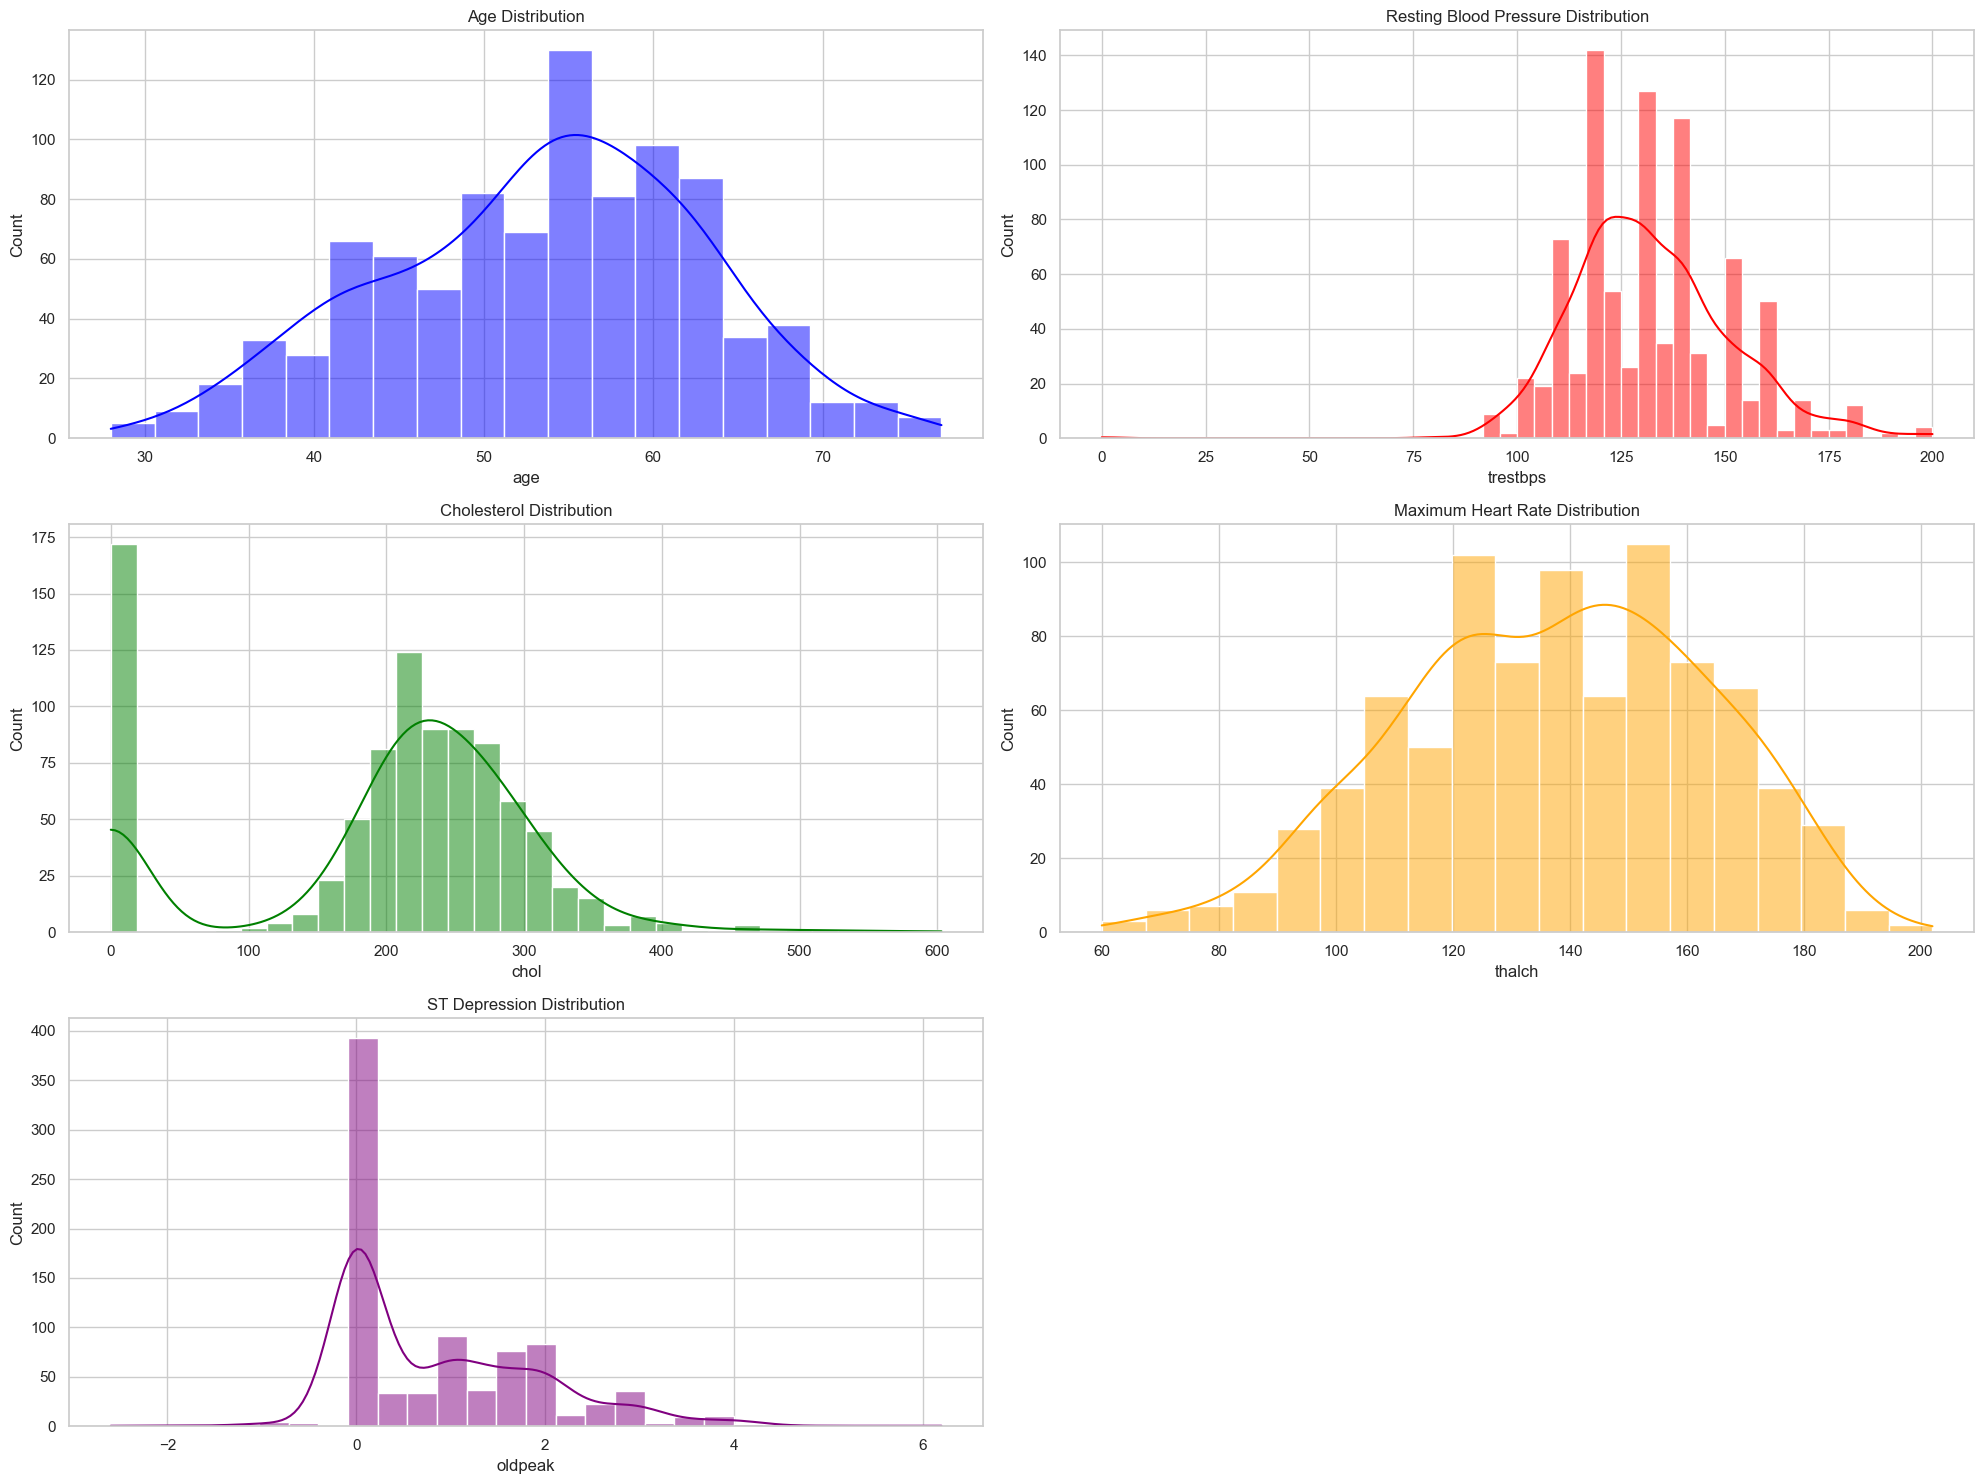

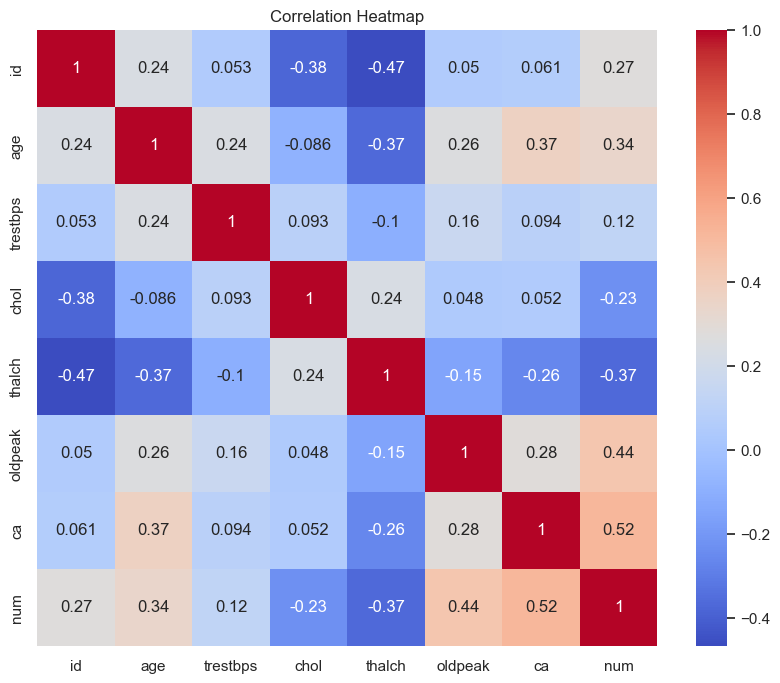

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Plotting distributions of key numerical variables
plt.figure(figsize=(20, 15), facecolor='white')

# Age distribution
plt.subplot(3, 2, 1)
sns.histplot(hd_df['age'], kde=True, color='blue')
plt.title('Age Distribution')

# Resting Blood Pressure distribution
plt.subplot(3, 2, 2)
sns.histplot(hd_df['trestbps'].dropna(), kde=True, color='red')
plt.title('Resting Blood Pressure Distribution')

# Cholesterol distribution
plt.subplot(3, 2, 3)
sns.histplot(hd_df['chol'].dropna(), kde=True, color='green')
plt.title('Cholesterol Distribution')

# Maximum Heart Rate distribution
plt.subplot(3, 2, 4)
sns.histplot(hd_df['thalch'].dropna(), kde=True, color='orange')
plt.title('Maximum Heart Rate Distribution')

# ST depression induced by exercise relative to rest
plt.subplot(3, 2, 5)
sns.histplot(hd_df['oldpeak'].dropna(), kde=True, color='purple')
plt.title('ST Depression Distribution')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8), facecolor='white')
corr = hd_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

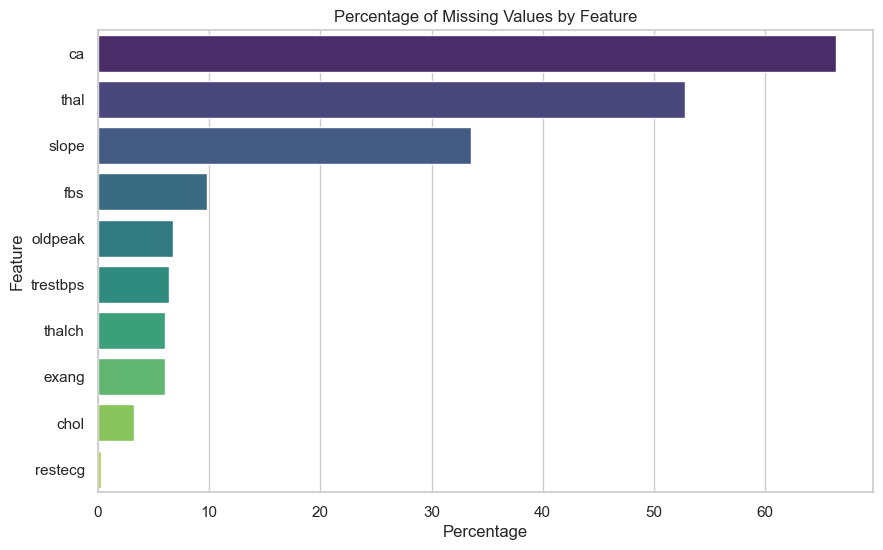

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the percentage of missing values for each column
missing_values_percent = hd_df.isnull().mean() * 100
missing_values_percent = missing_values_percent[missing_values_percent > 0].sort_values(ascending=False)

# Plotting the percentage of missing values
plt.figure(figsize=(10, 6), facecolor='white')
sns.barplot(x=missing_values_percent.values, y=missing_values_percent.index, palette='viridis')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Percentage')
plt.ylabel('Feature')
plt.show()

In [8]:
# Handle Missing Values: Identify and impute or remove missing values.
# Encode Categorical Variables: Convert categorical variables into a form that can be provided to ML algorithms via one-hot encoding.
# Normalize Numerical Variables: Scale numerical features to have a mean of 0 and a standard deviation of 1.
# Dimensionality Reduction: Apply PCA to reduce the dimensionality of the dataset, retaining the components that explain the most variance.

In [9]:
# Removing columns with excessive missing values
columns_to_remove = ['slope', 'ca', 'thal']
hd_df.drop(columns=columns_to_remove, inplace=True)

# Checking for remaining missing values after column removal
remaining_missing_values = hd_df.isnull().sum()
print('Remaining missing values after column removal:\
', remaining_missing_values)

Remaining missing values after column removal: id           0
age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
num          0
dtype: int64


In [10]:
from sklearn.impute import SimpleImputer

# Imputing numerical columns with median
numerical_imputer = SimpleImputer(strategy='median')
hd_df[['trestbps', 'chol', 'thalch', 'oldpeak']] = numerical_imputer.fit_transform(hd_df[['trestbps', 'chol', 'thalch', 'oldpeak']])

# Imputing categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
hd_df[['fbs', 'restecg', 'exang']] = categorical_imputer.fit_transform(hd_df[['fbs', 'restecg', 'exang']])

# Checking for missing values after imputation
final_missing_values = hd_df.isnull().sum()
print('Missing values after imputation:\
', final_missing_values)

Missing values after imputation: id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder



# Encoding categorical variables and normalizing numerical variables
# Identifying categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Applying preprocessing
X_preprocessed = preprocessor.fit_transform(hd_df)

# Converting to DataFrame for easier handling
X_preprocessed_df = pd.DataFrame(X_preprocessed)

# Display the shape of the preprocessed data
print('Shape of preprocessed data:', X_preprocessed_df.shape)

Shape of preprocessed data: (920, 18)


In [12]:
X_preprocessed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.007386,0.705176,0.303643,0.489727,1.368109,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.432034,1.518569,0.789967,-1.181478,0.611589,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.432034,-0.650479,0.266939,-0.345875,1.651804,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.752828,-0.108217,0.459634,1.961979,2.502889,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.328180,-0.108217,0.037541,1.365120,0.517024,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
# Extracting the encoded feature names from the OneHotEncoder within the ColumnTransformer
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)

# Combining the encoded feature names with the numerical column names to get the full list of preprocessed feature names
full_feature_names = list(numerical_cols) + list(feature_names)

# Updating the DataFrame with the correct column names
X_preprocessed_df.columns = full_feature_names

# Displaying the first few rows of the DataFrame with the updated column names
X_preprocessed_df.head()

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True
0,1.007386,0.705176,0.303643,0.489727,1.368109,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.432034,1.518569,0.789967,-1.181478,0.611589,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.432034,-0.650479,0.266939,-0.345875,1.651804,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.752828,-0.108217,0.459634,1.961979,2.502889,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.328180,-0.108217,0.037541,1.365120,0.517024,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
from sklearn.impute import SimpleImputer

# Creating an imputer object with a strategy of replacing missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fitting the imputer to the data and transforming it
X_imputed = imputer.fit_transform(X_preprocessed_df)

# Converting the imputed data back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X_preprocessed_df.columns)

# Verifying the imputation by checking for missing values
missing_values_after_imputation = X_imputed_df.isnull().sum().sum()

print('Missing values after imputation:', missing_values_after_imputation)
print('Shape of the dataset after imputation:', X_imputed_df.shape)

Missing values after imputation: 0
Shape of the dataset after imputation: (920, 18)


c:\Users\amila.w\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\amila.w\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\amila.w\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\amila.w\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

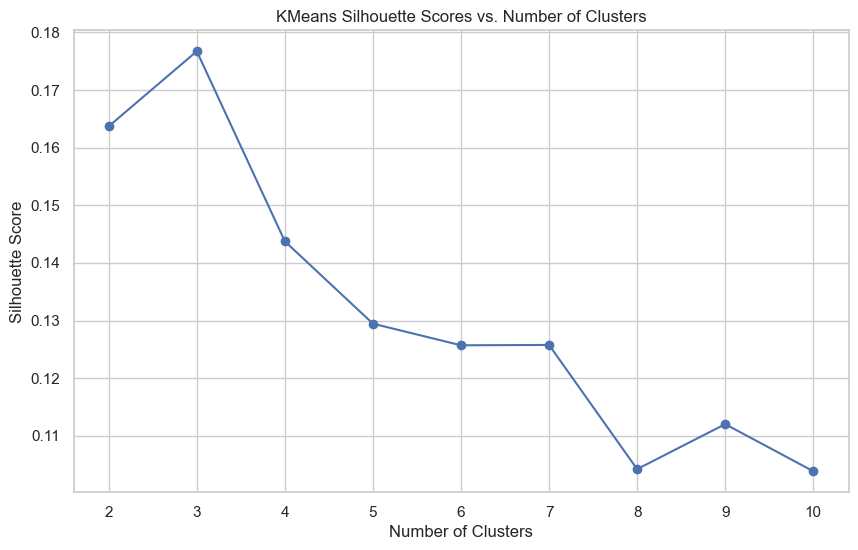

Optimal number of clusters for KMeans: 3
Agglomerative Clustering Silhouette Score: 0.12474757867898545
DBSCAN Silhouette Score: N/A


In [15]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Setting random seed for reproducibility
np.random.seed(42)

# Preparing the data
X = X_imputed_df

# KMeans Clustering - Finding optimal number of clusters using silhouette score
n_clusters_range = range(2, 11)
kmeans_silhouette_scores = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, kmeans_labels)
    kmeans_silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores for KMeans
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(n_clusters_range, kmeans_silhouette_scores, marker='o')
plt.title('KMeans Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Selecting the number of clusters with the highest silhouette score for further analysis
optimal_n_clusters = n_clusters_range[np.argmax(kmeans_silhouette_scores)]
print('Optimal number of clusters for KMeans:', optimal_n_clusters)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_n_clusters)
agglo_labels = agglo.fit_predict(X)
agglo_silhouette_score = silhouette_score(X, agglo_labels)
print('Agglomerative Clustering Silhouette Score:', agglo_silhouette_score)

# DBSCAN Clustering
# Using default parameters for DBSCAN
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X)
dbscan_silhouette_score = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A'
print('DBSCAN Silhouette Score:', dbscan_silhouette_score)

c:\Users\amila.w\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


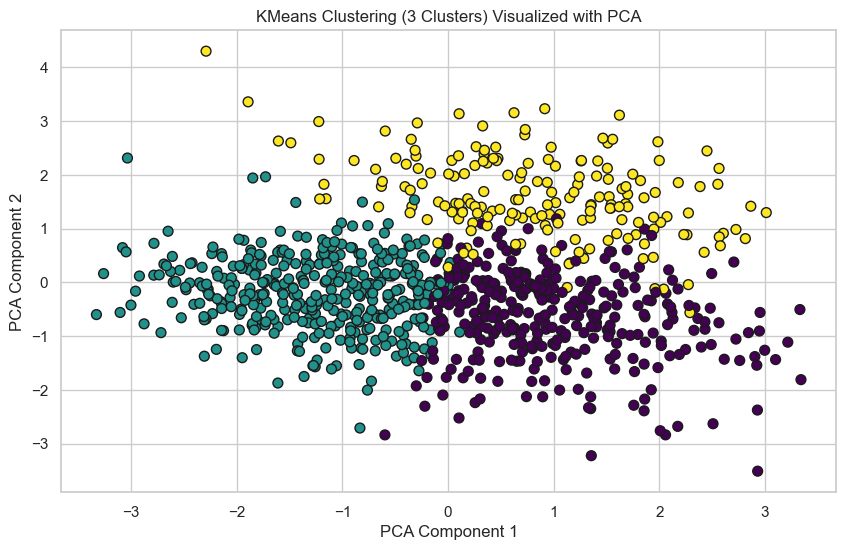

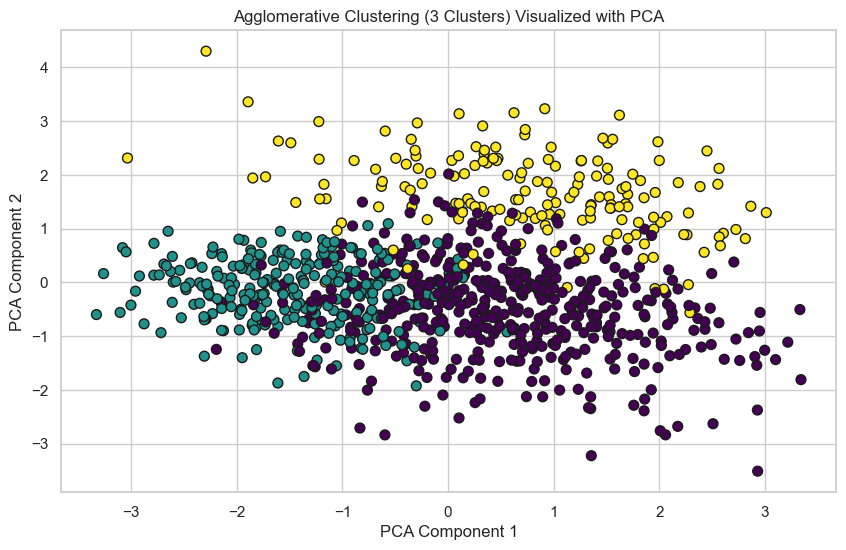

In [16]:
from sklearn.decomposition import PCA

# Reducing the dimensionality of the data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Applying KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 6), facecolor='white')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('KMeans Clustering (3 Clusters) Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# Applying Agglomerative Clustering with the optimal number of clusters
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 6), facecolor='white')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Agglomerative Clustering (3 Clusters) Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(x='num', data=heart_disease_df)
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.show()

# Correlation matrix to see the relationship between variables
plt.figure(figsize=(12, 10), facecolor='white')
corr_matrix = heart_disease_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()